<a href="https://colab.research.google.com/github/whiteevl/machine-learning/blob/main/Creating_and_Training_Models_to_Process_Image_Datasets_from_the_Real_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2023-12-09 08:45:34--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-12-09 08:45:34--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   188MB/s    in 

In [14]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [15]:
os.listdir('/tmp/Chessman-image-dataset/Chess')


['Knight', 'Bishop', 'Pawn', 'Queen', 'Rook', 'King']

In [16]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


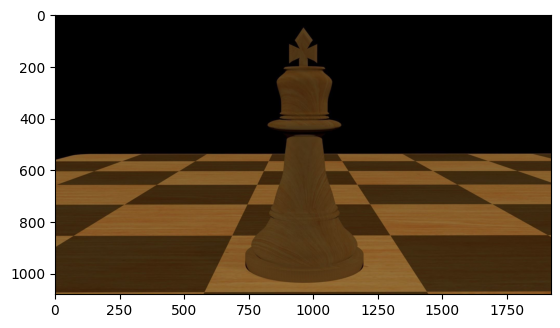

In [17]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [20]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [21]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [22]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 44s - loss: 1.8315 - accuracy: 0.1703 - val_loss: 1.7875 - val_accuracy: 0.2115 - 44s/epoch - 695ms/step
Epoch 2/50
63/63 - 42s - loss: 1.7802 - accuracy: 0.2084 - val_loss: 1.7776 - val_accuracy: 0.2115 - 42s/epoch - 666ms/step
Epoch 3/50
63/63 - 42s - loss: 1.7716 - accuracy: 0.2224 - val_loss: 1.7326 - val_accuracy: 0.2115 - 42s/epoch - 662ms/step
Epoch 4/50
63/63 - 43s - loss: 1.7425 - accuracy: 0.2625 - val_loss: 1.7406 - val_accuracy: 0.2692 - 43s/epoch - 679ms/step
Epoch 5/50
63/63 - 45s - loss: 1.6720 - accuracy: 0.3086 - val_loss: 1.6573 - val_accuracy: 0.2885 - 45s/epoch - 712ms/step
Epoch 6/50
63/63 - 42s - loss: 1.7067 - accuracy: 0.2705 - val_loss: 1.6706 - val_accuracy: 0.2692 - 42s/epoch - 673ms/step
Epoch 7/50
63/63 - 41s - loss: 1.6080 - accuracy: 0.3487 - val_loss: 1.7169 - val_accuracy: 0.3462 - 41s/epoch - 653ms/step
Epoch 8/50
63/63 - 40s - loss: 1.5850 - accuracy: 0.3487 - val_loss: 1.6163 - val_accuracy: 0.3462 - 40s/epoch - 636ms/step
Epoch 9/

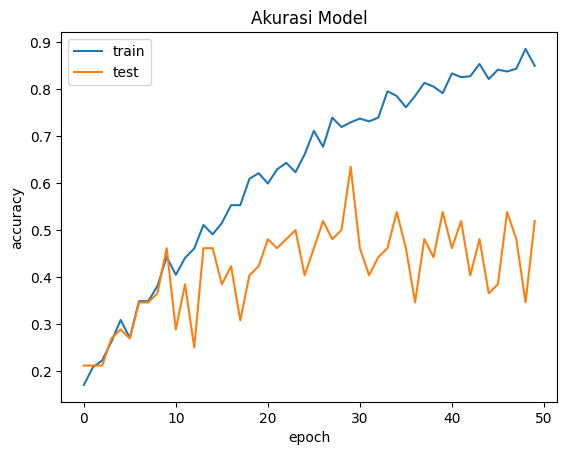

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

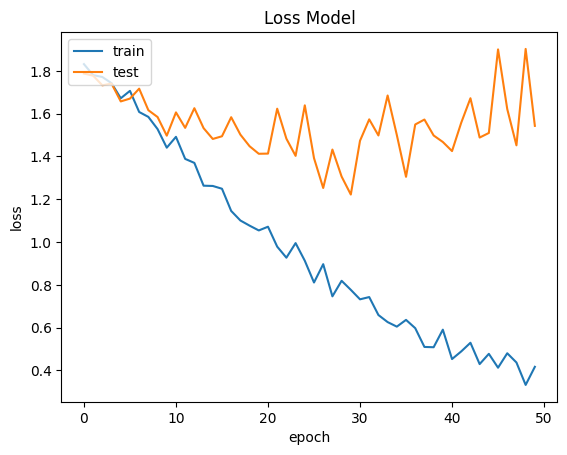

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()